# Análisis Forraje

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn

In [3]:
print("Lectura de los datos...")
df = pandas.read_csv('../datos/datos_forraje.csv', sep=",")

print("Primeros registros:")
print(df.head())

Lectura de los datos...
Primeros registros:
     fecha codigo_gps      coordenada_completa   longitug    latitud  \
0  11/2015     CG T01   -68.7056907/-43.291952 -68.705691 -43.291952   
1  11/2016     CG T01   -68.7056907/-43.291952 -68.705691 -43.291952   
2  11/2015     CG T02  -68.6608421/-43.2535963 -68.660842 -43.253596   
3  11/2016     CG T02  -68.6608421/-43.2535963 -68.660842 -43.253596   
4  11/2015     CG T03   -68.616647/-43.2181445 -68.616647 -43.218145   

  fn_valor_pastoral  
0              3,60  
1             15,00  
2              0,60  
3             15,40  
4              1,60  


In [8]:
print("Lectura de los datos...")
forraje_df = pandas.read_csv('../datos/datos_forraje_3_sondas.csv', sep=",")
print("Primeros registros:")
print(forraje_df.head())

Lectura de los datos...
Primeros registros:
    feacha codigo_gps      coordenada_completa    latitud   longitug  \
0  11/2015     CG T01   -68.7056907/-43.291952 -43.291952 -68.705691   
1  11/2015     CG T02  -68.6608421/-43.2535963 -43.253596 -68.660842   
2  11/2015     CG T03   -68.616647/-43.2181445 -43.218145 -68.616647   
3  11/2015     CG T04  -68.6180901/-43.1667136 -43.166714 -68.618090   
4  11/2015     CG T05  -68.6390379/-43.1237455 -43.123745 -68.639038   

   fn_valor_pastoral  dist_laguna_fría  distancia_telsen  dist_gastre  \
0                3.6          1.437643          2.597643     0.477643   
1                0.6          1.354438          2.514438     0.394438   
2                1.6          1.274792          2.434792     0.314792   
3                8.0          1.224804          2.384804     0.264804   
4                4.4          1.202783          2.362783     0.242783   

  sonda_cercana  acum_anual  acum_verano  
0        Gastre       119.8         13.7 

In [9]:
ARGENTINA_DEPARTAMENTOS_SHAPE_PATH = '/home/lmorales/work/docbook/shapes/departamentos-argentina.geojson'

In [10]:
import geopandas

Geo-data:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   departamento_id      527 non-null    object  
 1   departamento_nombre  527 non-null    object  
 2   provincia_id         527 non-null    object  
 3   provincia_nombre     527 non-null    object  
 4   region_name          527 non-null    object  
 5   geometry             527 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 24.8+ KB
None


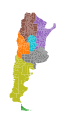

In [11]:
departments_shape = \
    geopandas.read_file(ARGENTINA_DEPARTAMENTOS_SHAPE_PATH)

print('Geo-data:')
print(departments_shape.info())

f, ax = plt.subplots(figsize=(2, 2))
departments_shape.plot(
    ax=ax,
    column='region_name',
    categorical=True,
    edgecolor='none',
    linewidth=0.02,
)
ax.axis('off')
plt.show();

In [12]:
chubut_gdf = departments_shape[departments_shape.provincia_nombre == 'Chubut']

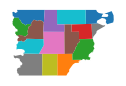

In [13]:
f, ax = plt.subplots(figsize=(2, 2))
chubut_gdf.plot(
    ax=ax,
    column='departamento_nombre',
    categorical=True,
    edgecolor='none',
    linewidth=0.02,
)
ax.axis('off')
plt.show();

In [14]:
forraje_gdf = geopandas.GeoDataFrame(
    forraje_df, geometry=geopandas.points_from_xy(forraje_df.longitug, forraje_df.latitud))

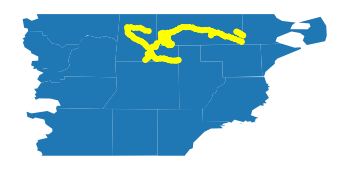

In [25]:
f, ax = plt.subplots(figsize=(6, 6))
ax2 = chubut_gdf.plot(
    ax=ax,
    edgecolor='none',
    linewidth=0.02,
)

forraje_gdf.plot(
    ax=ax2,
    color='yellow',
    edgecolor='none',
    linewidth=0.02,
)
ax.axis('off')
plt.show();

In [21]:
forraje_gdf_reproj = forraje_gdf.set_crs(chubut_gdf.crs)

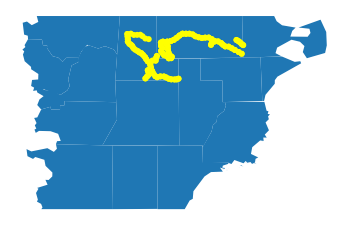

In [23]:
f, ax = plt.subplots(figsize=(6, 6))
ax2 = chubut_gdf.plot(
    ax=ax,
    edgecolor='none',
    linewidth=0.02,
)

forraje_gdf_reproj.plot(
    ax=ax2,
    color='yellow',
    edgecolor='none',
    linewidth=0.02,
)
ax.axis('off')
plt.show();

In [26]:
import contextily

In [30]:
import os

In [32]:
if not os.path.exists("basemaps_images"):
    os.mkdir('basemaps_images')
    print("Creada la carpeta 'basemaps_images'...")

# Código desde la documentación contextily: Evitar usar la API repetidas veces.
if not os.path.exists('basemaps_images/chubut.tif'):
    # Extract bounding box in Web Mercator
    w, s, e, n = chubut_gdf.to_crs(epsg=3857).total_bounds
    # Download file
    img, ext = contextily.bounds2raster(w, s, e, n,
        'basemaps_images/chubut.tif',
        source=contextily.providers.OpenStreetMap.Mapnik,
        #zoom=10
    )
    print("basemaps_images/chubut.tif descargada con éxito")

basemaps_images/chubut.tif descargada con éxito


In [50]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import StrMethodFormatter

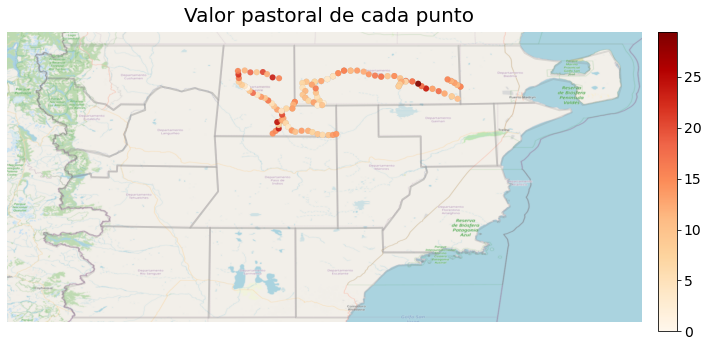

In [59]:
f, ax = plt.subplots(figsize=(12, 12))
# make_axes_locatable returns an instance of the AxesLocator class, 
# derived from the Locator. It provides append_axes method that 
# creates a new axes on the given side of (“top”, “right”, 
#“bottom” and “left”) of the original axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1, label='Title')

chubut_gdf.plot(
    edgecolor='grey',
    color='none',
    linewidth=1.9,
    alpha=0.2,
    ax=ax
)

forraje_gdf_reproj.plot(
    column='fn_valor_pastoral', # Column that determines color
    cmap='OrRd',  # Colormap
    edgecolor='black',
    cax=cax,      # Add a colorbar
    linewidth=0.02,
    legend=True,
    alpha=.9,
    ax=ax
)

# Format colorbar tick labels
cax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Set the fontsize for each colorbar tick label
for l in cax.yaxis.get_ticklabels():
    l.set_fontsize(14)

contextily.add_basemap(
    ax,
    source='basemaps_images/chubut.tif',
    crs=forraje_gdf_reproj.crs.to_string()
)

ax.axis('off')
ax.set_title(
    'Valor pastoral de cada punto',
    fontsize=20,
    pad=10
)

plt.show();